In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

plt.style.use('seaborn-v0_8-whitegrid')

In [2]:
data = pd.read_csv('data/german_credit_data.csv')

In [3]:
data.head()

,ID,Name,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,Amall Leingang,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,Marelda Knoebel,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,Adalhard Sautter,49,male,1,own,little,NaN,2096,12,education,good
3,3,Wilmot Natter,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,Bronson Strehle,53,male,2,free,little,little,4870,24,car,bad


In [4]:
data = data.drop(columns=["Name", "ID"])

In [5]:
data.isna().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [6]:
data = data.fillna('missing')

In [7]:
data

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,missing,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,missing,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,missing,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,missing,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [8]:
for column in ["Sex", "Job", "Housing", "Saving accounts", "Checking account", "Purpose", "Risk"]:
    # one_hot = pd.get_dummies(data[column], prefix=column)

    # data = data.drop(column, axis=1)
    # data = data.join(one_hot)

    data[column] = data[column].astype('category').cat.codes

In [9]:
data

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,1,2,1,1,0,1169,6,5,1
1,22,0,2,1,0,2,5951,48,5,0
2,49,1,1,1,0,1,2096,12,3,1
3,45,1,2,0,0,0,7882,42,4,1
4,53,1,2,0,0,0,4870,24,1,0
...,...,...,...,...,...,...,...,...,...,...
995,31,0,1,1,0,1,1736,12,4,1
996,40,1,3,1,0,0,3857,30,1,1
997,38,1,2,1,0,1,804,12,5,1
998,23,1,2,0,0,0,1845,45,5,0


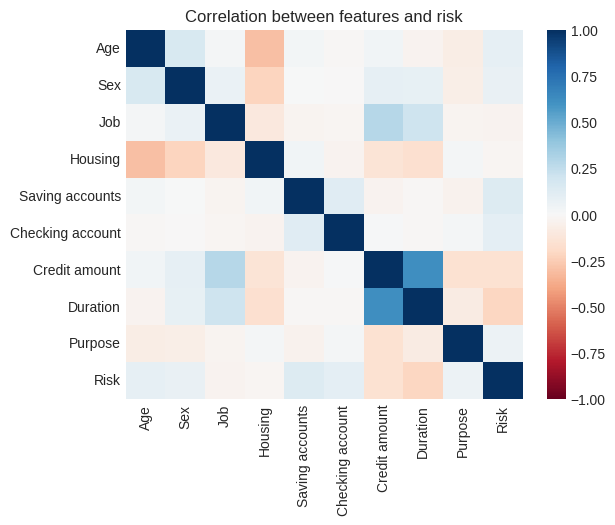

In [10]:
sns.heatmap(data.corr(numeric_only=False), cmap="RdBu", vmin=-1)
plt.title("Correlation between features and risk")
plt.savefig('plots/correlation.svg', transparent=True)
plt.show()

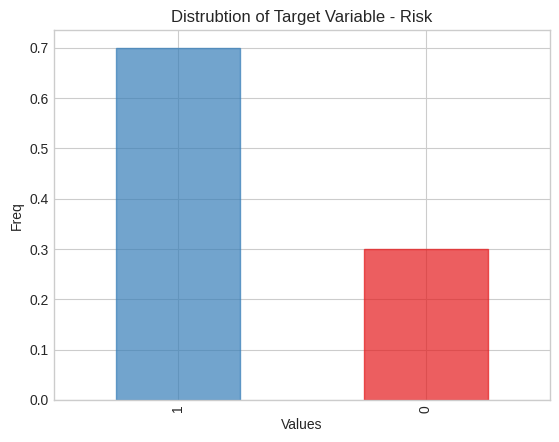

In [11]:
ax = data.Risk.value_counts(normalize=True).plot(kind='bar',title='Distrubtion of Target Variable - Risk', alpha=0.7);
ax.get_children()[0].set_color("#377eb8")
ax.get_children()[1].set_color("#e41a1c")
plt.xlabel('Values');
plt.ylabel('Freq');
plt.savefig('plots/risk.svg', transparent=True)
plt.show()

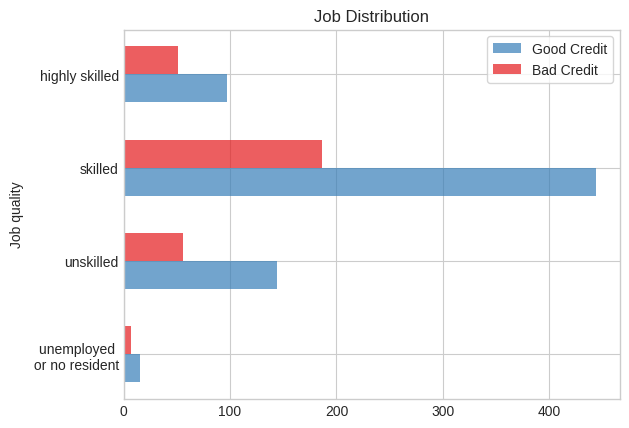

In [12]:
risk = data.groupby(["Job", "Risk"]).size().unstack()

plt.barh(np.arange(4), risk[1], height=0.3, color="#377eb8", alpha=0.7, label="Good Credit")
plt.barh(np.arange(4) + 0.3, risk[0], height=0.3, color= "#e41a1c", alpha=0.7, label="Bad Credit")

plt.title("Job Distribution")
plt.ylabel("Job quality")
plt.yticks(np.arange(4) + 0.15, labels=['unemployed \n or no resident', 'unskilled', 'skilled', 'highly skilled'])
# plt.xticks(np.linspace(0, 450, 10))

plt.legend(frameon=True)
plt.savefig('plots/jobs.svg', transparent=True)
plt.show()

In [13]:
data[["Age", "Risk"]]

,Age,Risk
0,67,1
1,22,0
2,49,1
3,45,1
4,53,0
...,...,...
995,31,1
996,40,1
997,38,1
998,23,0


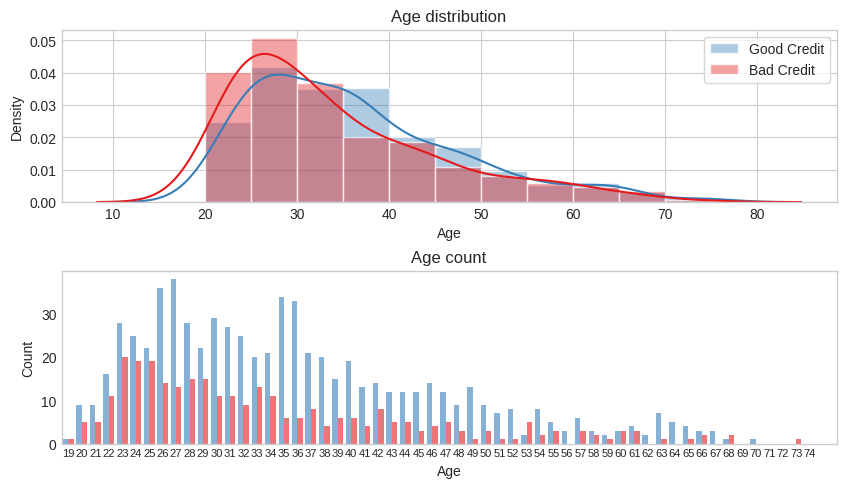

In [14]:
fig, axs = plt.subplots(nrows=2, figsize=(10, 6))
plt.subplots_adjust(hspace = 0.4, top = 0.8)

axs[0].set_title("Age distribution")

sns.histplot(data[data["Risk"] == 1]["Age"], bins=np.linspace(20, 75, num=12), kde=True, kde_kws=dict(cut=3), alpha=0.4, edgecolor=(1,1,1,0.7), color="#377eb8", label="Good Credit", stat="density", ax=axs[0])
sns.histplot(data[data["Risk"] == 0]["Age"], bins=np.linspace(20, 75, num=12), kde=True, kde_kws=dict(cut=3), alpha=0.4, edgecolor=(1,1,1,0.7), color="#e41a1c", label="Bad Credit", stat="density", ax=axs[0])

axs[0].legend(frameon=True)

axs[1].set_title("Age count")

axs[1].grid()
axs[1].hist(data[data["Risk"] == 1]["Age"], bins=np.arange(19, 75) - 0.4, width=0.4, color="#377eb8", alpha=0.6)
axs[1].hist(data[data["Risk"] == 0]["Age"], bins=np.arange(19, 75), width=0.4, color="#e41a1c", alpha=0.6)

axs[1].set_xticks(np.arange(19, 75))
axs[1].set_xlim(18.5, 76)
axs[1].set_xticklabels(np.arange(19, 75), fontsize=8)

axs[1].set_xlabel("Age")
axs[1].set_ylabel("Count")

plt.savefig("plots/age.svg", transparent=True)
plt.show()

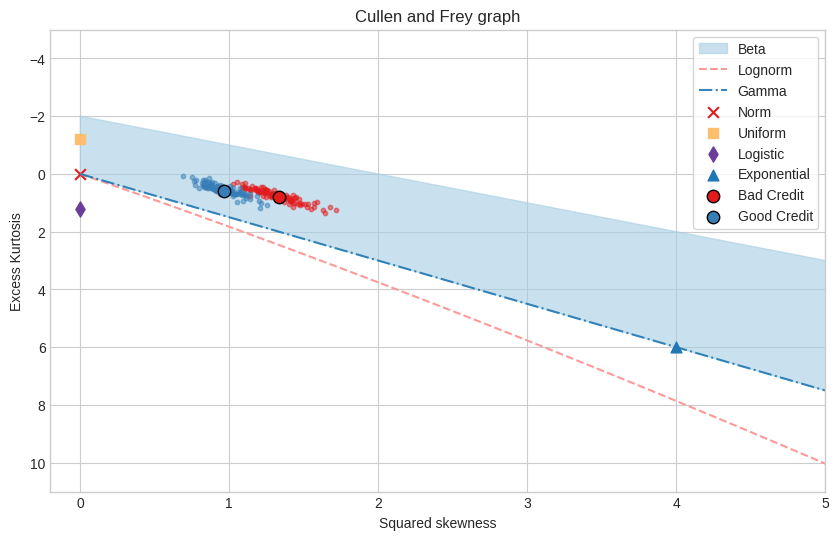

In [61]:
fig, ax = plt.subplots(figsize=(10, 6))

plt.title("Cullen and Frey graph")

plt.xlabel("Squared skewness")
plt.ylabel("Excess Kurtosis")

log_norm_eps = np.linspace(0, 0.75, num=100)
gamma_eps    = np.linspace(0, 3, num=1000)
beta_eps     = np.linspace(0, 12, num=1000)

norm     = (0, 0)
uniform  = (0, -6/5)
logistic = (0, 6/5)
exponential = (4, 6)

lognorm  = np.array([(np.exp(log_norm_eps**2) + 2)**2 * (np.exp(log_norm_eps**2) - 1), np.exp(4*log_norm_eps**2) + 2*np.exp(3*log_norm_eps**2) + 3*np.exp(2*log_norm_eps**2) - 6])
gamma    = np.array([4*gamma_eps, 6*gamma_eps])

plt.fill_between(beta_eps, beta_eps-2, 3/2*beta_eps, color="#a6cee3", alpha=0.6, label="Beta")
plt.plot(*lognorm, label="Lognorm", linestyle='--', color="#fb9a99")
plt.plot(*gamma, label="Gamma", linestyle='-.', color="#1f78b4", alpha=0.9)
plt.scatter(*norm, label="Norm", marker='x', s=60, color="#e31a1c")
plt.scatter(*uniform, label="Uniform", marker='s', s=60, color="#fdbf6f")
plt.scatter(*logistic, label="Logistic", marker='d', s=60, color="#6a3d9a")
plt.scatter(*exponential, label="Exponential", marker='^', s=60, color="#1f78b4")

distr_bad = data[data["Risk"] == 0]["Age"]

for _ in range(100):
    bs = np.random.choice(distr_bad, size=(1000,))
    plt.scatter(st.skew(bs)**2, st.kurtosis(bs), color="#e41a1c", s=10, alpha=0.5)


distr_good = data[data["Risk"] == 1]["Age"]

for _ in range(100):
    bs = np.random.choice(distr_good, size=(1000,))
    plt.scatter(st.skew(bs)**2, st.kurtosis(bs), color="#377eb8", s=10, alpha=0.5)

plt.scatter(distr_bad.skew()**2, distr_bad.kurtosis(), s=80, color="#e41a1c", label="Bad Credit", edgecolors="black")
plt.scatter(distr_good.skew()**2, distr_good.kurtosis(), s=80, color="#377eb8", label="Good Credit", edgecolors="black")

plt.xlim(-0.2, 5)
plt.ylim(-5, 11)
ax.invert_yaxis()

plt.legend(frameon=True)

plt.savefig('plots/cullen_frey.svg', transparent=True)
plt.show()

/home/danielgardin/.local/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:1838: RuntimeWarning: invalid value encountered in add
  logp = (np.log(a) + np.log(c) + sc.xlogy(a - 1.0, exm1c) +
/home/danielgardin/.local/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2085: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/home/danielgardin/.local/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


IndexError: index 1182 is out of bounds for axis 0 with size 1000

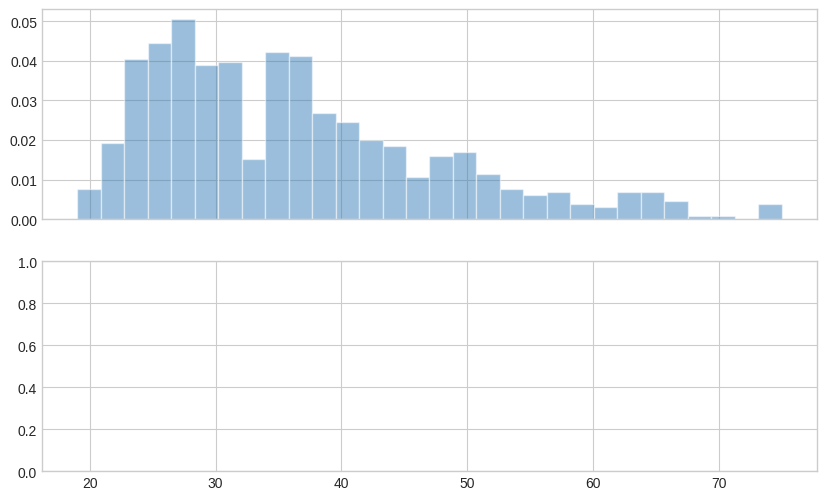

In [118]:
fig, axs = plt.subplots(nrows=2, figsize=(10, 6), sharex=True)

beta_params = np.zeros((1000, 4))
weibull_params = np.zeros((1000, 4))
pvalues = np.zeros((1000, 2))

for i in range(100):
    bs = np.random.choice(distr_good, size=(1000,))
    
    param   = np.array(st.beta.fit(bs, loc=20, scale=100))
    w_param = np.array(st.exponweib.fit(bs, loc=20, scale=100))

    beta_params[i]    = param
    weibull_params[i] = w_param
    pvalues[i] = [st.kstest(distr_good, 'beta', param).pvalue, st.kstest(distr_good, 'exponweib', w_param).pvalue]
pass
best = beta_params[pvalues.argmax()]

axs[0].hist(distr_good, bins=30, color="#377eb8", alpha=0.5, density=True, edgecolor=(1,1,1,1))
axs[0].plot(np.arange(10, 85), st.beta.pdf(np.arange(10, 85), *best), label=f"Beta Distribution (pvalue{pvalues.max() : .3f})", color="#6a3d9a")

for i in range(1000):
    bs = np.random.choice(distr_bad, size=(1000,))
    
    param = np.array(st.beta.fit(bs, loc=20, scale=100))

    beta_params[i] = param
    pvalues[i] = st.kstest(distr_bad, 'beta', param).pvalue

best = beta_params[pvalues.argmax()]

axs[1].hist(distr_bad, bins=30, color="#e41a1c", alpha=0.5, density=True, edgecolor=(1,1,1,1))
axs[1].plot(np.arange(10, 85), st.beta.pdf(np.arange(10, 85), *best), label=f"Beta Distribution (pvalue{pvalues.max() : .3f})", color="#6a3d9a")

axs[0].legend(frameon=True)
axs[1].legend(frameon=True)

fig.suptitle("Age distribution")

axs[0].set_title("Bad Credit", fontsize=10)
axs[1].set_title("Good Credit", fontsize=10)

axs[1].set_xlabel("Age")

axs[0].set_ylabel("Density")
axs[1].set_ylabel("Density")

plt.savefig("plots/age_distribution.svg", transparent=True)
plt.show()

In [124]:
pvalues

array([[2.58342626e-01, 2.58342626e-01],
       [3.85354652e-01, 3.85354652e-01],
       [1.44342317e-01, 1.44342317e-01],
       ...,
       [2.77432895e-01, 2.77432895e-01],
       [3.42911842e-14, 3.42911842e-14],
       [2.63921834e-01, 2.63921834e-01]])

In [123]:
pvalues.argmax(axis=0)

array([591, 591])

In [109]:
pvalues.mean(), pvalues.std()

(0.3700493095944228, 0.34509475814427837)

In [107]:
best = params[pvalues.argmax()]

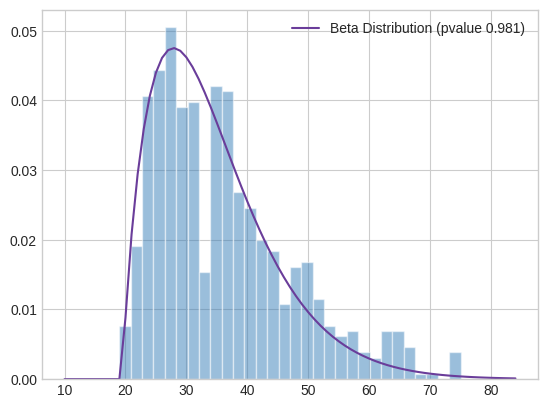

In [108]:
plt.hist(distr_good, bins=30, color="#377eb8", alpha=0.5, density=True, edgecolor=(1,1,1,1))
plt.plot(np.arange(10, 85), st.exponweib.pdf(np.arange(10, 85), *best), label=f"Beta Distribution (pvalue{pvalues.max() : .3f})", color="#6a3d9a")

plt.legend()
plt.show()

In [71]:
params.mean(axis=0)

array([1.32621382e+00, 9.18038709e+04, 2.03001427e+01, 5.62091831e+05])

In [73]:
params.std(axis=0)

array([6.10700199e-01, 4.08232607e+05, 1.33823561e+00, 2.48169079e+06])

(2.491606867286417, 0.9033914667931393, 18.71828620865846, 8.387839799263887)
(1.4377030614748199, 1.30359721572131, 18.84035591631299, 15.555350002664433)


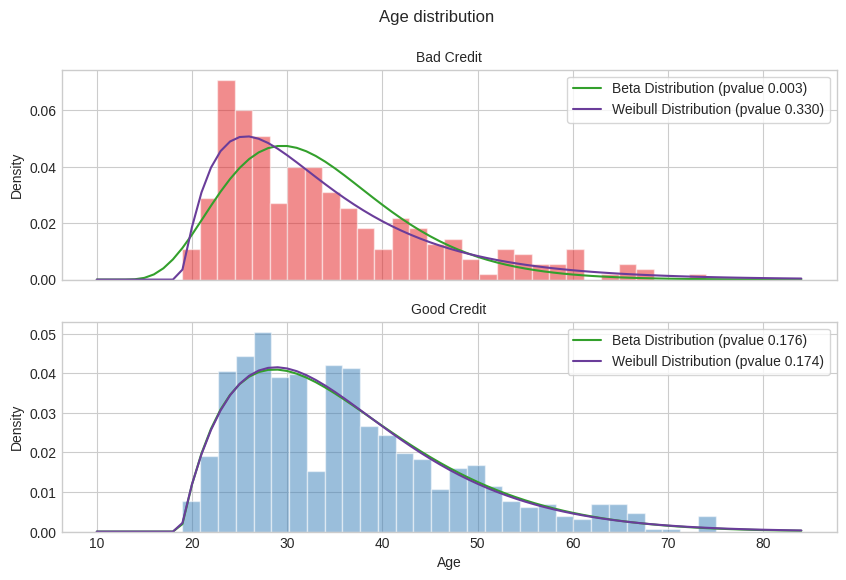

In [59]:


distr = data[data["Risk"] == 0]["Age"]

axs[0].hist(distr, bins=30, color="#e41a1c", alpha=0.5, density=True, edgecolor=(1,1,1,1))

beta_params = st.beta.fit(distr, loc=0)
axs[0].plot(np.arange(10, 85), st.beta.pdf(np.arange(10, 85), *beta_params), label=f"Beta Distribution (pvalue{st.kstest(distr, 'beta', beta_params).pvalue : .3f})", color="#33a02c")

exponweib_params = st.exponweib.fit(distr, loc=20)
print(exponweib_params)
axs[0].plot(np.arange(10, 85), st.exponweib.pdf(np.arange(10, 85), *exponweib_params), label=f"Weibull Distribution (pvalue{st.kstest(distr, 'exponweib', exponweib_params).pvalue : .3f})", color="#6a3d9a")

distr = data[data["Risk"] == 1]["Age"]

axs[1].hist(distr, bins=30, color="#377eb8", alpha=0.5, density=True, edgecolor=(1,1,1,1))

beta_params = st.beta.fit(distr, loc=0)
axs[1].plot(np.arange(10, 85), st.beta.pdf(np.arange(10, 85), *beta_params), label=f"Beta Distribution (pvalue{st.kstest(distr, 'beta', beta_params).pvalue : .3f})", color="#33a02c")

exponweib_params = st.exponweib.fit(distr, loc=20)
print(exponweib_params)
axs[1].plot(np.arange(10, 85), st.exponweib.pdf(np.arange(10, 85), *exponweib_params), label=f"Weibull Distribution (pvalue{st.kstest(distr, 'exponweib', exponweib_params).pvalue : .3f})", color="#6a3d9a")

axs[0].legend(frameon=True)
axs[1].legend(frameon=True)

fig.suptitle("Age distribution")

axs[0].set_title("Bad Credit", fontsize=10)
axs[1].set_title("Good Credit", fontsize=10)

axs[1].set_xlabel("Age")

axs[0].set_ylabel("Density")
axs[1].set_ylabel("Density")

plt.savefig("plots/age_distr.svg", transparent=True)
plt.show()

In [17]:
plt.figure(figsize=(14,8))
sns.boxplot(y='Credit amount',x='Purpose',hue='Risk',data=data1);

#From this plot, Vacation/others variable will be helpful in knowing the risk.. 

NameError: name 'data1' is not defined

<Figure size 1400x800 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


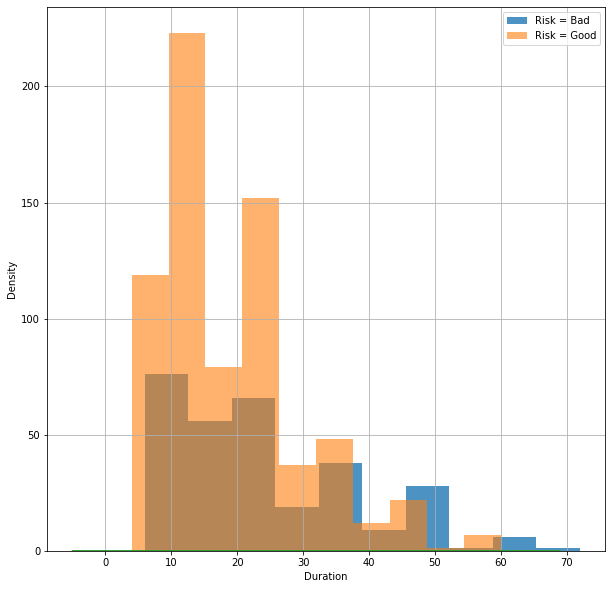

In [ ]:
plt.figure(figsize=(10,10))
plt.xlabel('Duration')
#data[data.Risk=='good']['Credit amount'].hist(alpha=0.5,bins=50,label='Risk = Good')#,color='R')
data[data.Risk=='bad']['Duration'].hist(alpha=0.8,label='Risk = Bad')#,color='G')
data[data.Risk=='good']['Duration'].hist(alpha=0.6,label='Risk = Good')#,color='R')
sns.distplot(data[data.Risk=='good']['Duration'])
plt.legend();

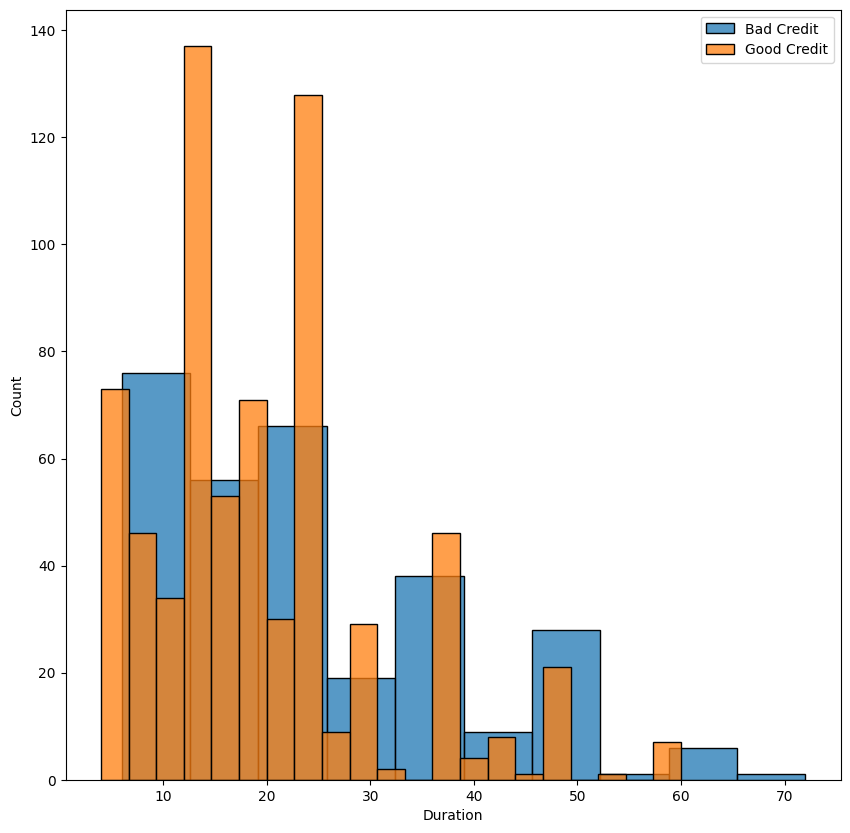

In [ ]:
plt.figure(figsize=(10,10))
g2 = sns.histplot(data[data.Risk=='bad']["Duration"], label='Bad Credit');
g2 = sns.histplot(data[data.Risk=='good']["Duration"],label='Good Credit');
plt.legend();

In [ ]:
def get_duration_buckets(var):
    if var<=24:
        return '0-2 Years'
    elif var<=48:
        return '2-4 years'
    else:
        return '> 4 years'

In [ ]:
#data1.Duration=data1.Duration.map(get_duration_buckets)

In [ ]:
data1.Duration.value_counts()

24    184
12    179
18    113
36     83
6      75
15     64
9      49
48     48
30     40
21     30
10     28
60     13
27     13
42     11
11      9
20      8
8       7
4       6
45      5
7       5
39      5
14      4
13      4
33      3
28      3
54      2
16      2
22      2
47      1
5       1
26      1
72      1
40      1
Name: Duration, dtype: int64

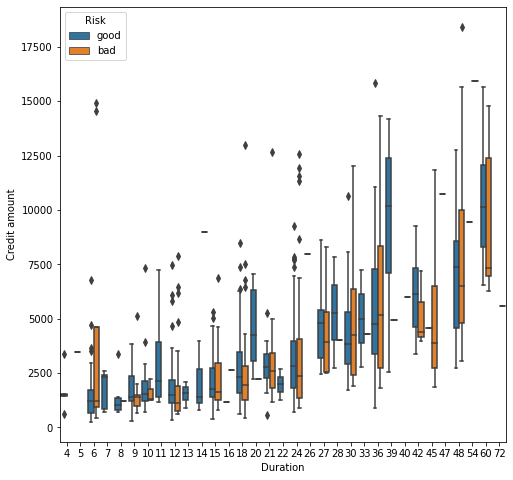

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(x='Duration',y='Credit amount',hue='Risk',data=data1)

In [ ]:
dummy_frame=data1
for col in list(data1.columns):
    #print(col,'-->',data1[col].dtype)
    if np.dtype(data1[col])=='object':            #drop_first=True removes the first dummy column 
        dummy_frame=dummy_frame.merge(pd.get_dummies(data1[col],prefix=col,drop_first=True),left_index=True, right_index=True)
        dummy_frame.drop(col,axis=1,inplace=True)
dummy_frame.head()

,Age,Job,Credit amount,Duration,Sex_male,Housing_own,Housing_rent,Saving accounts_little,Saving accounts_moderate,Saving accounts_quite rich,...,Checking account_moderate,Checking account_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Risk_good
0,67,2,1169,6,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,22,2,5951,48,0,1,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
2,49,1,2096,12,1,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
3,45,2,7882,42,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
4,53,2,4870,24,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
dummy_frame.columns

Index(['Age', 'Job', 'Credit amount', 'Duration', 'Sex_male', 'Housing_own',
       'Housing_rent', 'Saving accounts_little', 'Saving accounts_moderate',
       'Saving accounts_quite rich', 'Saving accounts_rich',
       'Checking account_little', 'Checking account_moderate',
       'Checking account_rich', 'Purpose_car', 'Purpose_domestic appliances',
       'Purpose_education', 'Purpose_furniture/equipment', 'Purpose_radio/TV',
       'Purpose_repairs', 'Purpose_vacation/others', 'Risk_good'],
      dtype='object')

In [ ]:
dummy_frame.to_csv('/content/drive/MyDrive/MO810_MC959_2022S2_SHARE/Dados/german_credit_data_.csv')